[View in Colaboratory](https://colab.research.google.com/github/YaminiMuralidharen/MachineLearningexercises/blob/master/MultipleLinearRegression.ipynb)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Mean absolute error 7514.293659636814
Mean squared error 83502864.03250548
root Mean squared error 83502864.03250548


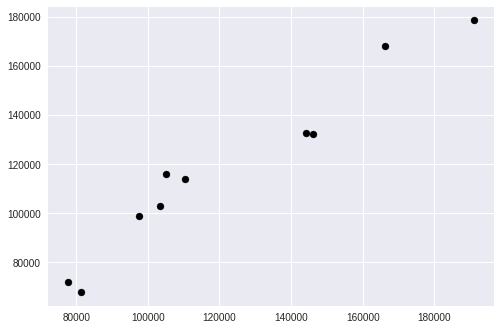

In [2]:
#importing the libraries


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import data set

dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1].values
y =dataset.iloc[:,4].values


# encoding category data and independant variable
#USE label encoder /one heart encoder to encode the string variables to numeric
#state column replaced by 3 dummy  variable colimns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3]) # LABEL ENCODER CHANGE TEXT TO NUMBER
onehotencoder = OneHotEncoder(categorical_features =[3])
X = onehotencoder.fit_transform(X).toarray()  
#Avoid dummy variable to remove one dummy variable manually - remove redundant dependancy
X = X[:, 1:] # elimating 0 th column

# Splitting data set into training set and testing set

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

#no feature scaling as library will take care of it

# fitting multiple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predict testset results

y_pred = regressor.predict(X_test)

#Plotting train set results
#plt.scatter(X_test,y_test,color='red')
plt.scatter(y_test, regressor.predict(X_test), color='black')

from sklearn import metrics
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("root Mean squared error",metrics.mean_squared_error(y_test,y_pred))